In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# 원본 데이터
with open("./dataset/creditcard.pkl","rb") as file:
    data = pickle.load(file)
    
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df = data.copy()

# Time 을 일중 시간으로 변환
df.loc[:, "Time"] = df.loc[:, "Time"].apply(lambda x : x / 3600 % 24)

# Amount column 은 편차가 크므로 log-scale 로 변환
df['Amount'] = np.log(df.pop('Amount') + 0.001)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


# 진지하게 시작함

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
features = df.values
labels = np.array(df.pop('Class'))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

print("X train shape: ", X_train.shape)
print("Y train shape: ", y_train.shape)
print("Y train anomaly: ", len(np.where(y_train == 1)[0]),"개")
print("===============")
print("X validation shape: ", X_val.shape)
print("Y validation shape: ", y_val.shape)
print("Y validation anomaly: ", len(np.where(y_val == 1)[0]),"개")
print("===============")
print("X test shape: ", X_test.shape)
print("Y test shape: ", y_test.shape)
print("Y test anomaly: ", len(np.where(y_test == 1)[0]),"개")

X train shape:  (99682, 31)
Y train shape:  (99682,)
Y train anomaly:  176 개
X validation shape:  (99682, 31)
Y validation shape:  (99682,)
Y validation anomaly:  168 개
X test shape:  (85443, 31)
Y test shape:  (85443,)
Y test anomaly:  148 개


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
x_val= sc.transform(X_val)

# TabNetClassifier
- https://github.com/dreamquark-ai/tabnet
- https://github.com/dreamquark-ai/tabnet/blob/develop/pretraining_example.ipynb

In [8]:
import torch
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetClassifier

In [9]:
# F1_score 불러오기
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import f1_score

class F1_Score(Metric):
    def __init__(self):
        self._name = "f1"
        self._maximize = True

    def __call__(self, y_true, y_score):
        score = f1_score(y_true, (y_score[:, 1]>0.5)*1)
        return score

# Self Supervised Training

In [10]:
# TabNetPretrainer
unsupervised_model = TabNetPretrainer(
#     cat_idxs=cat_idxs,
#     cat_dims=cat_dims,
#     cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax",
#     n_shared_decoder=1, # nb shared glu for decoding
#     n_indep_decoder=1, # nb independent glu for decoding
#     grouped_features=[[0, 1]], # you can group features together here
#     verbose=5,
)

In [11]:
unsupervised_model.fit(
    X_train=X_train,
    eval_set=[X_val],
#     max_epochs=1000, patience=5,
#     batch_size=2048, virtual_batch_size=128,
#     num_workers=0,
#     drop_last=False,
    pretraining_ratio=0.5,
) 

epoch 0  | loss: 1.12933 | val_0_unsup_loss_numpy: 18.453630447387695|  0:00:10s
epoch 1  | loss: 0.88709 | val_0_unsup_loss_numpy: 87.55159759521484|  0:00:20s
epoch 2  | loss: 0.78316 | val_0_unsup_loss_numpy: 292.7870788574219|  0:00:30s
epoch 3  | loss: 0.53731 | val_0_unsup_loss_numpy: 200.2208251953125|  0:00:40s
epoch 4  | loss: 0.80659 | val_0_unsup_loss_numpy: 101.43927001953125|  0:00:49s
epoch 5  | loss: 0.55406 | val_0_unsup_loss_numpy: 233.6882781982422|  0:00:59s
epoch 6  | loss: 0.70405 | val_0_unsup_loss_numpy: 87.23078918457031|  0:01:08s
epoch 7  | loss: 0.75204 | val_0_unsup_loss_numpy: 44.50117111206055|  0:01:18s
epoch 8  | loss: 0.56936 | val_0_unsup_loss_numpy: 68.68524169921875|  0:01:27s
epoch 9  | loss: 0.30853 | val_0_unsup_loss_numpy: 48.07991027832031|  0:01:36s
epoch 10 | loss: 0.13571 | val_0_unsup_loss_numpy: 243.7440185546875|  0:01:44s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_unsup_loss_numpy = 18.453630447387695


In [12]:
# Make reconstruction from a dataset
reconstructed_X, embedded_X = unsupervised_model.predict(X_val)
assert(reconstructed_X.shape==embedded_X.shape)

In [13]:
unsupervised_explain_matrix, unsupervised_masks = unsupervised_model.explain(X_val)

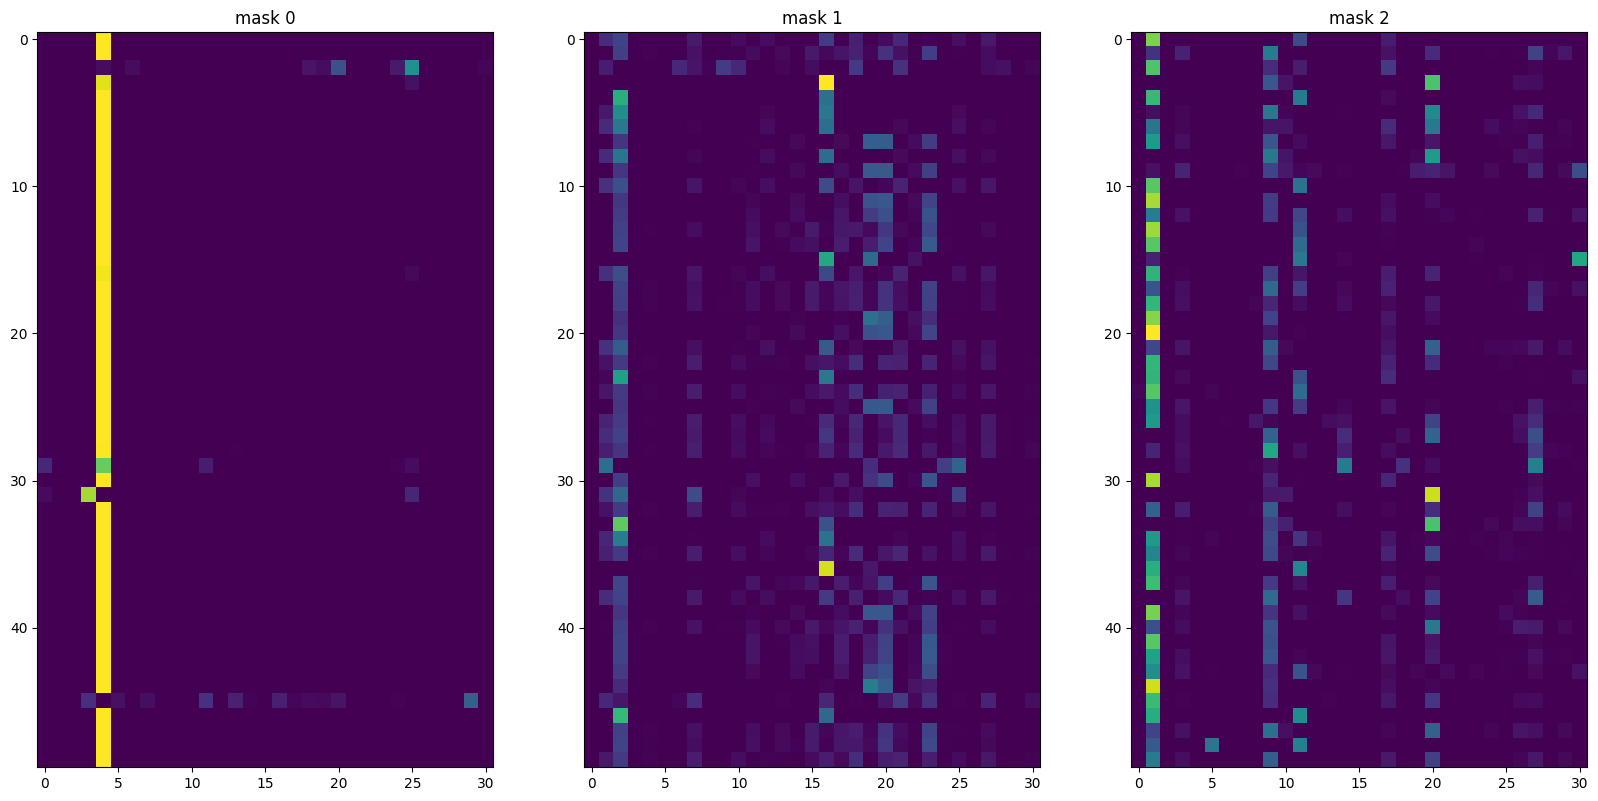

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(unsupervised_masks[i][:50])
    axs[i].set_title(f"mask {i}")

# Training

In [15]:
clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-3),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax', # This will be overwritten if using pretrain model
#     verbose=5,
)

In [16]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1'],
#     max_epochs=max_epochs , patience=20,
#     batch_size=1024, virtual_batch_size=128,
#     num_workers=0,
#     weights=1,
#     drop_last=False,
    from_unsupervised=unsupervised_model,
    
) 

epoch 0  | loss: 0.15824 | train_logloss: 0.04147 | train_f1: 0.13757 | valid_logloss: 0.05392 | valid_f1: 0.02479 |  0:00:10s
epoch 1  | loss: 0.02583 | train_logloss: 0.01421 | train_f1: 0.65428 | valid_logloss: 0.03512 | valid_f1: 0.06897 |  0:00:20s
epoch 2  | loss: 0.01096 | train_logloss: 0.00905 | train_f1: 0.69416 | valid_logloss: 0.02645 | valid_f1: 0.12222 |  0:00:30s
epoch 3  | loss: 0.00738 | train_logloss: 0.00712 | train_f1: 0.76677 | valid_logloss: 0.02543 | valid_f1: 0.19048 |  0:00:40s
epoch 4  | loss: 0.00642 | train_logloss: 0.00473 | train_f1: 0.78431 | valid_logloss: 0.02484 | valid_f1: 0.03468 |  0:00:50s
epoch 5  | loss: 0.00554 | train_logloss: 0.00415 | train_f1: 0.81013 | valid_logloss: 0.02425 | valid_f1: 0.1     |  0:01:00s
epoch 6  | loss: 0.00508 | train_logloss: 0.00463 | train_f1: 0.80503 | valid_logloss: 0.02303 | valid_f1: 0.11236 |  0:01:10s
epoch 7  | loss: 0.00432 | train_logloss: 0.00331 | train_f1: 0.80251 | valid_logloss: 0.02457 | valid_f1: 0.04

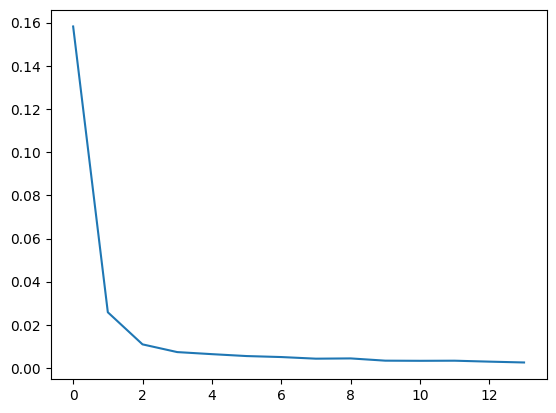

In [17]:
# plot losses
plt.plot(clf.history['loss'])

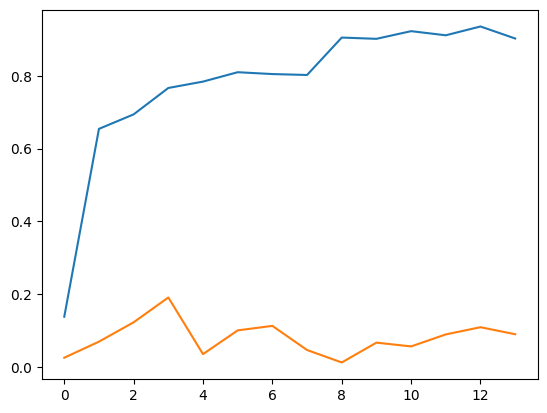

In [18]:
# plot auc
plt.plot(clf.history['train_f1'])
plt.plot(clf.history['valid_f1'])

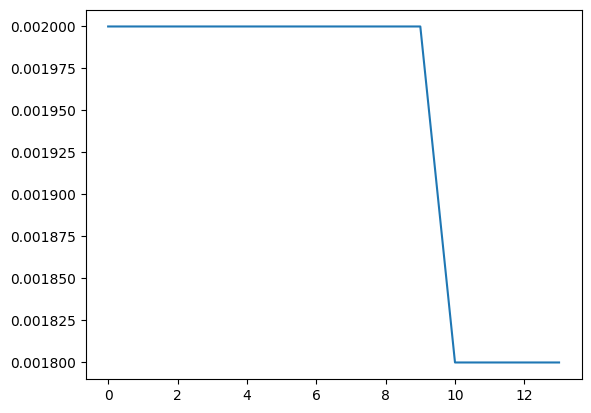

In [19]:
# plot learning rates
plt.plot(clf.history['lr'])

# Predictions

In [20]:
# preds = clf.predict_proba(X_test)
preds = clf.predict(X_test)
test_f1 = f1_score(preds, y_test)

preds_val = clf.predict(X_val)
valid_f1 = f1_score(preds_val, y_val)

print("BEST VALID SCORE : ", clf.best_cost)
print("FINAL TEST SCORE : ", test_f1)

BEST VALID SCORE :  0.19047619047619047
FINAL TEST SCORE :  0.7557251908396947


In [21]:
# check that best weights are used
assert np.isclose(valid_f1, np.max(clf.history['valid_f1']), atol=1e-6)

# Save and load Model

In [24]:
# save tabnet model
saving_path_name = "./tabnet_model_test_1"
saved_filepath = clf.save_model(saving_path_name)

Successfully saved model at ./tabnet_model_test_1.zip


In [25]:
# define new model with basic parameters and load state dict weights
loaded_clf = TabNetClassifier()
loaded_clf.load_model(saved_filepath)

In [26]:
# loaded_preds = loaded_clf.predict_proba(X_test)
loaded_preds = loaded_clf.predict(X_test)
loaded_test_f1 = f1_score(loaded_preds, y_test)

print("FINAL TEST SCORE : ",loaded_test_f1)

FINAL TEST SCORE :  0.7557251908396947


In [27]:
assert(test_f1 == loaded_test_f1)

# Global explainability : feat importance summing to

In [29]:
clf.feature_importances_

array([0.00417877, 0.25808404, 0.0940326 , 0.0183465 , 0.01649421,
       0.04674486, 0.01114494, 0.0377486 , 0.00781595, 0.03022685,
       0.00215139, 0.04323709, 0.00511505, 0.01299276, 0.01465025,
       0.04762403, 0.00602502, 0.01120866, 0.053812  , 0.00647994,
       0.05883692, 0.03483572, 0.00677915, 0.03354781, 0.00977191,
       0.02386877, 0.00202251, 0.01282937, 0.02945011, 0.01236395,
       0.04758025])

# Local explainability and masks

In [30]:
explain_matrix, masks = clf.explain(X_test)

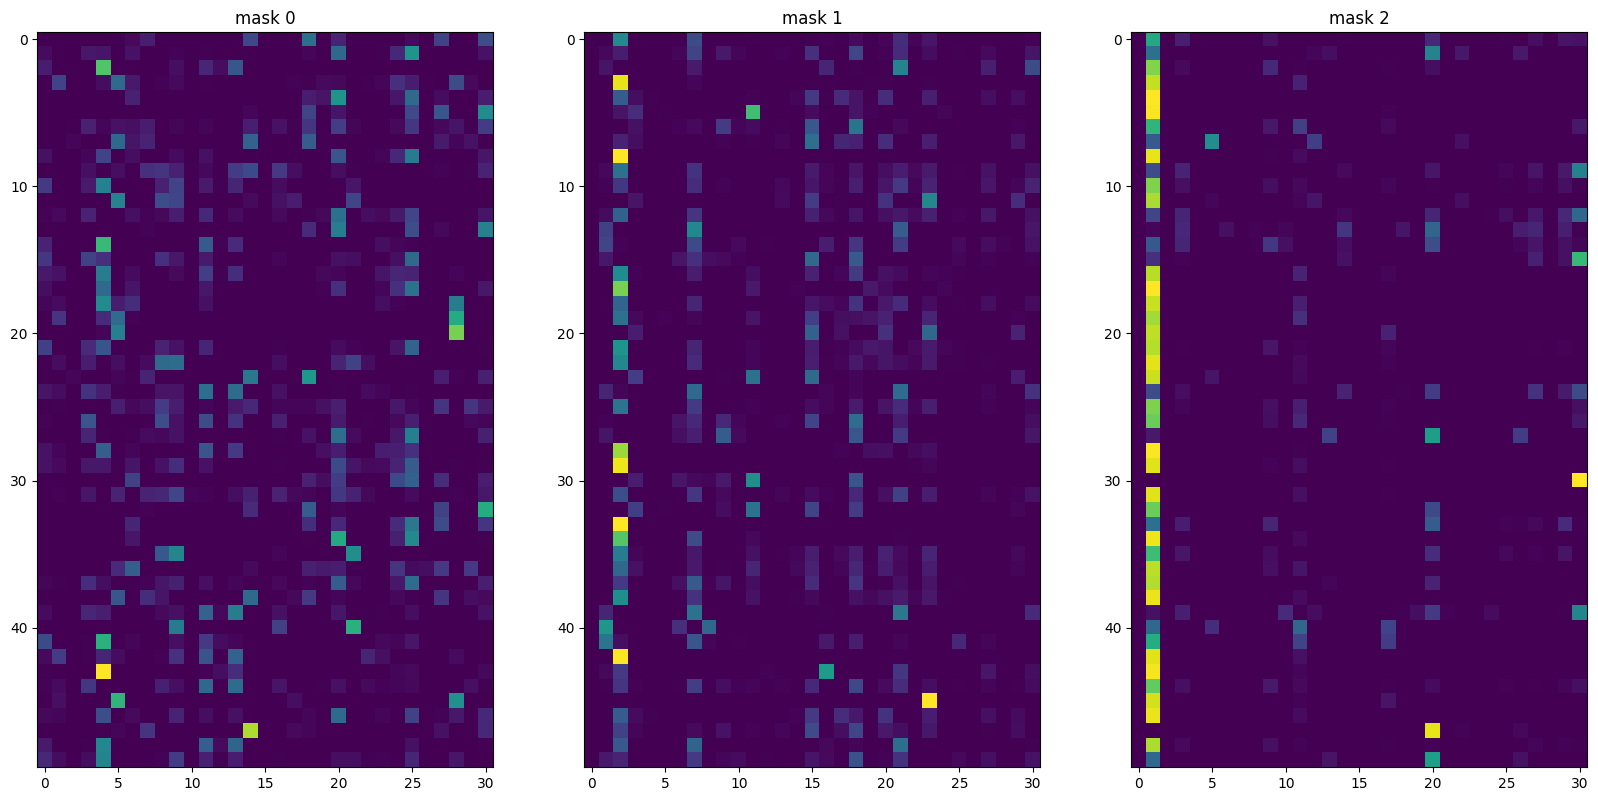

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")